In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.visualization import plot_box_plot
from src.data_cleaning import remove_outliers_iqr
from scripts.load_data import load_data, columns

%matplotlib inline

In [ ]:
# load the data
df = load_data()

df.head(10)

In [ ]:
df.describe()

In [ ]:
# citizenship has a lot of empty values that are considered as true values
# replace them with nan values
# also do this for all columns 
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.info()

In [ ]:
df.shape

In [ ]:
df.rename(columns={"mmcode": "MMCODE", "make": "Make", "cubiccapacity": "CubicCapacity", "kilowatts": "Kilowatts",
                   "bodytype": "BodyType"}, inplace=True)

In [ ]:
df["TransactionMonth"] = pd.to_datetime(df[
                                            "TransactionMonth"]).dt.date  # TODO: why does the pd.to_datetime(column).dt.date give an object instead of a datetime
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])

In [ ]:
df.dropna(subset=["MMCODE"], inplace=True)

In [ ]:
df["CapitalOutstanding"] = df["CapitalOutstanding"].str.replace(",", "").astype(float)

In [ ]:
df.dropna(subset=["CapitalOutstanding"], axis=0, inplace=True)

In [ ]:
df.fillna({
    "Citizenship": df["Citizenship"].mode()[0],
    "WrittenOff": df["WrittenOff"].mode()[0],
    "Rebuilt": df["Rebuilt"].mode()[0],
    "Converted": df["Converted"].mode()[0],
    "CrossBorder": df["CrossBorder"].mode()[0],
    "Bank": df["Bank"].mode()[0],
    "AccountType": df["AccountType"].mode()[0],
    "MaritalStatus": df["MaritalStatus"].mode()[0],
    "Gender": df["Gender"].mode()[0],
    "CustomValueEstimate": 0,
    "NewVehicle": df["NewVehicle"].mode()[0],
}, inplace=True)

In [ ]:
# drop the NumberOfVehiclesInFleet column since there are not a single value registered
df.drop(columns=["NumberOfVehiclesInFleet"], inplace=True)

In [ ]:
df["Cylinders"] = df["Cylinders"].astype(int)
df["NumberOfDoors"] = df["Cylinders"].astype(int)

In [ ]:
df["UnderwrittenCoverID"] = df["UnderwrittenCoverID"].astype(object)
df["PolicyID"] = df["PolicyID"].astype(object)
df["PostalCode"] = df["PostalCode"].astype(object)
df["MMCODE"] = df["MMCODE"].astype(object)
df["RegistrationYear"] = df["RegistrationYear"].astype(object)

In [ ]:
df.dtypes

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
vehicles_with_no_cylinders = np.unique(df[df["Cylinders"] == 0]["VehicleType"])
vehicles_with_no_cylinders

In [ ]:
for vehicle in vehicles_with_no_cylinders:
    mode = df[(df["VehicleType"] == vehicle) & (df["Cylinders"] != 0)]["Cylinders"].mode()[0]
    df["Cylinders"] = np.where((df["VehicleType"] == vehicle) & (df["Cylinders"] == 0), mode, df["Cylinders"])

In [ ]:
vehicles_with_no_doors = np.unique(df[df["NumberOfDoors"] == 0]["VehicleType"])
vehicles_with_no_doors

In [ ]:
for vehicle in vehicles_with_no_doors:
    mode = df[(df["VehicleType"] == vehicle) & (df["NumberOfDoors"] != 0)]["NumberOfDoors"].mode()[0]
    df["NumberOfDoors"] = np.where((df["VehicleType"] == vehicle) & (df["NumberOfDoors"] == 0), mode, df["NumberOfDoors"])

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

## Uni-variate Analysis

### Cylinders of Insured Cards Distribution
Here the most frequent value for the Cylinders is excluded from the pie chart because of the extreme size difference but a logarithmic scaled version of a bar chart can be found below

In [ ]:
cylinders_perc = df["Cylinders"].value_counts().reset_index()
cylinders_perc.columns = ["Cylinders", "Count"]
cylinders_perc["Percentages"] = cylinders_perc["Count"] / cylinders_perc["Count"].sum()

# explode = [0.0, 0.0, 0.0, 0.1, 0.2, 0.3]
explode = [0.0, 0.0, 0.1, 0.2, 0.3]
x = cylinders_perc[cylinders_perc["Cylinders"] != 4]

plt.figure(figsize=(20, 10))
plt.title("Cylinders Percentages")

plt.pie(x["Percentages"],explode=explode, pctdistance=1.5, labels=x["Cylinders"])

plt.legend([f"{value} Cylinders" for value in x["Cylinders"]])
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Bar Plot Showing the Cylinders Distribution')

plt.bar(cylinders_perc['Cylinders'], cylinders_perc['Count'])

plt.xticks(ticks=cylinders_perc['Cylinders'])
plt.xlabel("Cylinders")
plt.ylabel("Count")

plt.yscale('log')
plt.show()

### Cubic Capacity of Insured Vehicles Distribution

Here I was able to detect alot of outliers when I used a box plot to plot the data. I then used the IQR method to remove the outliers and plot the data again. The box plot below shows the cubic capacity of the cars after removing the outliers

In [ ]:
plot_box_plot(df, 'CubicCapacity', 'Cubic Capacity for Vehicles')

In [ ]:
df_no_outlier = remove_outliers_iqr(df, 'CubicCapacity')

plot_box_plot(df_no_outlier, 'CubicCapacity', 'Cubic Capacity for Vehicles', outliers=False, step=100)

### Kilowatts of Insured Vehicles Distribution

In [ ]:
plot_box_plot(df_no_outlier, 'Kilowatts', 'Kilowatts for Vehicles')

In [ ]:
df_no_outlier = remove_outliers_iqr(df_no_outlier, 'Kilowatts')

plot_box_plot(df_no_outlier, 'Kilowatts', 'Kilowatts for Vehicles', outliers=False, step=10)

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(df_no_outlier, x='Kilowatts', bins=20, stat='frequency')

### Number of Doors in Insured Vehicles Distribution

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(df_no_outlier, x='NumberOfDoors')

### Total Premium of Insured Cars Distribution

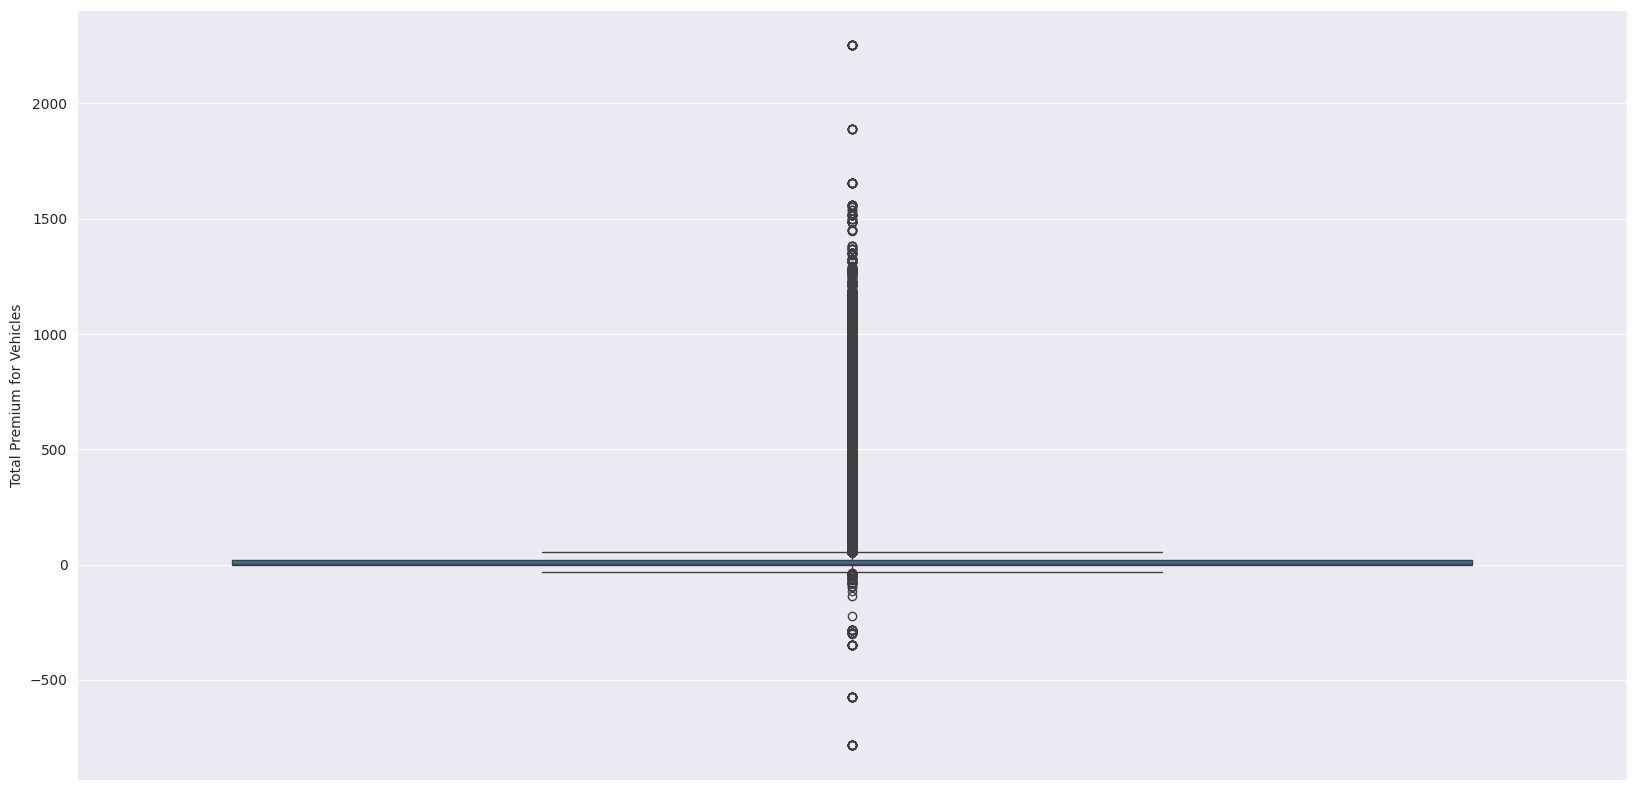

In [38]:
plot_box_plot(df, 'TotalPremium', 'Total Premium for Vehicles')

In [ ]:
df_no_outlier = remove_outliers_iqr(df_no_outlier, 'TotalPremium')

plot_box_plot(df_no_outlier, 'TotalPremium')

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(df_no_outlier, x='TotalPremium', bins=20, stat='frequency')

## Bivariate Analysis